In [1]:
# importing necessary libraries
import requests 
import urllib.request
from bs4 import BeautifulSoup 
import csv 
import pandas as pd 
import re
import time
from datetime import datetime


# creating a data frame from the csv file
df = pd.read_csv("../data/data.csv") 
# display("All the 356 PR Links:")
# display(df['Pull Request'])

In [2]:
# Filtering only the PR of Apache Company Repository
apacheDataSet = df[df['Repo'].str.contains('/apache')]

In [3]:
# Filtering only the PR of Mozilla Company Repository
mozillaDataSet = df[df['Repo'].str.contains('/mozilla')]

In [4]:
# Filtering only the PR of Google Company Repository
googleDataSet = df[df['Repo'].str.contains('/google')]

In [5]:
# Filtering only the PR of Facebook Company Repository
facebookDataSet = df[df['Repo'].str.contains('/facebook')]
# display(googleDataSet)
# display(googleDataSet.count())

In [6]:
# Using only Apache PR's
pullRequestList=googleDataSet['Pull Request'].values.tolist()

In [7]:
print("Length of PR's of Apache:")
print(len(pullRequestList))

Length of PR's of Apache:
36


In [8]:
print(googleDataSet['Pull Request'])

252              https://github.com/google/grr/pull/138
253              https://github.com/google/tie/pull/649
254        https://github.com/google/ggrc-core/pull/931
255             https://github.com/google/truth/pull/81
256       https://github.com/google/ggrc-core/pull/6966
257            https://github.com/google/caja/pull/2026
258          https://github.com/google/blockly/pull/771
259    https://github.com/google/ctfscoreboard/pull/161
260       https://github.com/google/ggrc-core/pull/6771
261     https://github.com/google/error-prone/pull/1159
262       https://github.com/google/ggrc-core/pull/8278
263               https://github.com/google/grr/pull/18
264       https://github.com/google/ggrc-core/pull/8199
265       https://github.com/google/bamboo-soy/pull/158
266       https://github.com/google/ExoPlayer/pull/3185
267              https://github.com/google/tie/pull/378
268        https://github.com/google/ExoPlayer/pull/307
269         https://github.com/google/ggrc-core/

In [9]:
# pullRequestList.extend(apacheDataSet['Pull Request'].values.tolist())

In [10]:
print("Length of PR's of Apache:")
print(len(pullRequestList))

Length of PR's of Apache:
36


In [11]:
dictw = {'title':[], 
        'comment':[]
         
       } 
resultDF = pd.DataFrame(dictw) 

In [12]:
date_time_str = '01/02/19'

date_time_obj = datetime.strptime(date_time_str, '%d/%m/%y')
print(date_time_obj)


2019-02-01 00:00:00


In [13]:
newUrls=[]
for i in range(len(pullRequestList)):
    URL = pullRequestList[i]
    try:
        source = urllib.request.urlopen(URL)
    except urllib.error.HTTPError as exception:
        print()
    soup = BeautifulSoup(source, 'html.parser')
    
    dateObtained = soup.find('div', attrs={'class': 'flex-auto min-width-0 mb-2'})
    if dateObtained:
        d=dateObtained.find('relative-time').get_text()
        newD = d.split()
        nn=newD[1].replace(',', '')
        if newD[0]=='Jan':
            mon='01'
        if newD[0]=='Feb':
            mon='02'
        if newD[0]=='Mar':
            mon='03'
        if newD[0]=='Apr':
            mon='04'
        if newD[0]=='May':
            mon='05'
        if newD[0]=='Jun':
            mon='06'
        if newD[0]=='Jul':
            mon='07'
        if newD[0]=='Aug':
            mon='08'
        if newD[0]=='Sep':
            mon='09'
        if newD[0]=='Oct':
            mon='10'
        if newD[0]=='Nov':
            mon='11'
        if newD[0]=='Dec':
            mon='12'
        ye=newD[2][2]
        last=newD[2][3]
        year=ye+last
        finalDate= nn+"/"+mon+"/"+year
        newdate = datetime.strptime(finalDate, '%d/%m/%y')
        if date_time_obj < newdate:
            newUrls.append(URL)

In [14]:
commitsList=[]
commitHistory=[]
filesChangedList = []
green = []
red = []
conversation=[]
gr=[]
rd=[]


headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }

for i in range(len(pullRequestList)):
    URL = pullRequestList[i]
    try:
        source = urllib.request.urlopen(URL)
    except urllib.error.HTTPError as exception:
        print(URL+"- Doesnt Exist (HHTP 404 Error)")
    soup = BeautifulSoup(source, 'html.parser')
    
    mainTitle = soup.find('h1', attrs = {'class':'gh-header-title mb-2 lh-condensed f1 mr-0 flex-auto break-word'})
    comment = soup.find('div',attrs={'class':'edit-comment-hide'})
    
    heading=""
    if mainTitle:
        for row in mainTitle.findAll('span', attrs = {'class':'js-issue-title'}):
            heading=row.get_text()
            for roww in comment.findAll('td', attrs = {'class':'d-block comment-body markdown-body js-comment-body'}):
                finalComment=roww.get_text()+'.'
            resultDF.loc[len(resultDF.index)] = [heading, finalComment]
    else:
        resultDF.loc[len(resultDF.index)] = [heading, ""]
    
    raw = soup.find('nav', attrs = {'class':'tabnav-tabs d-flex overflow-auto'})
    
    if raw:
        for span in raw.findAll('span', attrs = {'class':'Counter js-updateable-pull-request-commits-count'}):
            commitsList.append(span.get_text())
    else:
        commitsList.append(0)
    
    
    if raw and raw.findAll('span', attrs = {'id':'files_tab_counter'}):
        for span in raw.findAll('span', attrs = {'id':'files_tab_counter'}):
            filesChangedList.append(span.get_text())
    else:
        filesChangedList.append(0)      
   
    code_churn_data = soup.find('div', attrs = {'class':'tabnav-extra float-right d-none d-md-block'})
    
#     gr.append(soup.find('span', attrs = {'class':'color-text-success'}))
#     rd.append(soup.find('span', attrs = {'class':'color-text-danger'}))
    
    if code_churn_data and raw:
        for i in code_churn_data.find_all('span', attrs = {'class':'color-text-success'}):
            green.append(re.sub(r'\D', '', i.get_text()))
        for j in code_churn_data.find_all('span', attrs = {'class':'color-text-danger'}):
            red.append(re.sub(r'\D', '', j.get_text()))
    else:
        green.append(0)
        red.append(0)
    
   
  
    

https://github.com/google/ggrc-core/pull/931- Doesnt Exist (HHTP 404 Error)
https://github.com/google/ggrc-core/pull/6966- Doesnt Exist (HHTP 404 Error)
https://github.com/google/ggrc-core/pull/6771- Doesnt Exist (HHTP 404 Error)
https://github.com/google/ggrc-core/pull/8278- Doesnt Exist (HHTP 404 Error)
https://github.com/google/ggrc-core/pull/8199- Doesnt Exist (HHTP 404 Error)
https://github.com/google/ggrc-core/pull/47- Doesnt Exist (HHTP 404 Error)
https://github.com/google/ggrc-core/pull/1337- Doesnt Exist (HHTP 404 Error)
https://github.com/google/ggrc-core/pull/587- Doesnt Exist (HHTP 404 Error)
https://github.com/google/ggrc-core/pull/537- Doesnt Exist (HHTP 404 Error)


In [15]:
print(len(list(map(int, commitsList))))
resultDF['num_commits']  = list(map(int, commitsList)) 
resultDF['files_changed']  = list(map(int, filesChangedList))

36


In [16]:
greenlist = list(map(int, green)) 
redlist = list(map(int, red)) 

In [18]:
res_list = [] 
for i in range(0, len(green)): 
    res_list.append(greenlist[i] + redlist[i]) 

In [20]:
resultDF['code_churn'] = res_list

In [21]:
resultDF

,title,comment,num_commits,files_changed,code_churn
0,\n Removed unnecessary regex escaping\n...,"\nThis may not be the best way to solve this, ...",1,1,0
1,\n Allowed regex to be tolerant of the ...,\n\nNo description provided.\n\n.,6,2,14
2,,,0,0,0
3,\n Add regex matching to StringSubject ...,\n\nNo description provided.\n\n.,1,3,174
4,,,0,0,0
5,\n Fix capitalization in the safeEntity...,\n\nNo description provided.\n\n.,1,0,0
6,\n Split the scrollbar and flyout out i...,\nare siblings of the workpsace SVG. This pav...,3,8,277
7,\n Add a case-insensitive regex check.\...,\n\nNo description provided.\n\n.,1,3,33
8,,,0,0,0
9,\n Moe Sync\n,\nThis code has been reviewed and submitted in...,69,235,8356


In [22]:
comment_list=resultDF['comment'].values.tolist()

In [23]:
title_list=resultDF['title'].values.tolist()

In [24]:
rootCause=[]
# regExString=["regex","regular expression"]
# apiURLString=["api","url"]
for index in range(len(comment_list)):
    if "regex" in comment_list[index] or "regex" in title_list[index]: 
        rootCause.append("regEx")
    elif "regular expression" in comment_list[index] or "regex" in title_list[index]:
        rootCause.append("regEx")
    elif "URL" in comment_list[index] or "regex" in title_list[index]:
        rootCause.append("API")
    elif "API" in comment_list[index] or "regex" in title_list[index]:
        rootCause.append("API")
    else:
        rootCause.append("Other")

In [25]:
resultDF['Root Cause'] = rootCause 

In [27]:
# Identifying Manifestation
manifestation=[]
newFeatureStringList=["add","ADD","url rewriting","octothrope", "PARSING","regex matching","Add a case-insensitive regex", "getSymbolsByName","suffix and prefix","predicate", "FireError","integration test "]

incorrectBehaviourStringList=["proper","modified","fixed","fix","change","changing","changes","expanding regex","expand","automatically", "inbound finder", "synchronized", "Distinct","CSSRewriter regex", "issue", "discord", "zero uncovered lines", "new regex", "ManifestStaticFilesStorage", "Improve catch-all regex", "Re-arrange", "Better regex matching", "redirect regex", "character issue", "Exclude Placeables", "copy/pasting", "tolerant", "expediency", "Non-greedy regex ", "non-word characters", "extracting codec information", "Wrong Language Syntax", "edit", "equality validator", "Update", "linebreaks", "empty object", "flawed ", "dangerfile ES module","sanitization ","investigation ","trailing slash","versioned subdirectories","testNamePattern","package coupling","potential inconsistency","Preserve","pattern match","incorrectly escaping","testPathDirs","Resolve","Fix header link generation"]

compileErrorStringList=["detected","reworked","confusing","not support"]

badsmellrStringList=["refactor","update","updating","parse","Replace","better", "invert", "deprecation warnings", "github's edit","correct escape for regex", "querySelectors", "warnings", "typo", "unused regex", "flake8 errors", "tests", "additional redirects", "Removed", "unnecessary", "corrupt", "invalid", "generator tests","problems", "Edit", "reduction error","more tests","literal expression"]

incorrectComputationStringList=["assertion","full path matching","small backwards compatability","weird semantics"]


for index in range(len(comment_list)):
    if any(x in comment_list[index] for x in newFeatureStringList) or any(x in title_list[index] for x in newFeatureStringList):
        manifestation.append("new feature")
    elif any(x in comment_list[index] for x in incorrectComputationStringList) or any(x in title_list[index] for x in incorrectComputationStringList):
         manifestation.append("incorrect computation")
    elif any(x in comment_list[index] for x in badsmellrStringList) or any(x in title_list[index] for x in badsmellrStringList):
         manifestation.append("bad smell")
    elif any(x in comment_list[index] for x in compileErrorStringList) or any(x in title_list[index] for x in compileErrorStringList):
        manifestation.append("compile error")
    elif any(x in comment_list[index] for x in incorrectBehaviourStringList) or any(x in title_list[index] for x in incorrectBehaviourStringList):
         manifestation.append("incorrect behavior")
    else:
        manifestation.append("other failure")

In [28]:
resultDF['Manifestation'] = manifestation 

In [30]:

category=[]

#T2
acceptingInvalidStringList=["Bugfix for regex","Fix integration test script","SSP mail form","Optimize inbound finder",
                            "display_name regex","regex for matching origins","WhiteNoise serve","catch-all regex",
                            "regex matching for native JS","fake FTL Message","safeEntityNameRe regex","Java Comment RegEx",
                            "string equality validator","module detection regex","root pattern",
                            "regex that really never matches","refactor server routing","bad routing regex",
                            "Jest moduleNameMapper regex","exclude node_modules"]

incorrectExtractionStringList=["StringExpander regex","fix whitelist","Fix greedy regex","Non-greedy regex",
                               "docblock comments","regex match in `fv`","filename without directory"]

dataProcessingStringList=["Add helper script","Add sec","Enabling extraction","Add custom context","in new usernames",
                          "octothrope comments","SVG elements","Shortcuts for boolean arguments","add init option","support for CSS Modules"]

#designs smell
badSmellStringList=["Refactor","Rename","Optimize","Invert regex","refactor regex","Edit pylintrc file",
                    "reduction error regex","regular expression literals","serializer smarter"]

regexConfigStringList=["configurable","config","simple url rewriting","mount point for autofs","testNamePattern CLI",
                       "Better filter"]

regexLikeImplStringList=["REGEXP_EXTRACT","Regex replacement","regex filter","regex matching","Added STR_REGEX",
                         "Regex validator","results in typeahead"]
#T1
rejectingValidStringList=["better regex","RegEx pattern should be updated","replaces the regex","Import l10n files",
                          "gauntlet regex","ESR version suffix","regex for validation","Discord validation",
                          "TOOLKIT_VERSION_REGEX","regex in `nl2br`","interactive-examples to iframes",
                          "legacy redirect regex","non alphanumeric slugs","regex to be tolerant","AttributeError Regex",
                          "regular expression for CODEC","comma separators in ISO-8601","RegEx in js-to-json",
                          "Enabled https regex","linebreaks when scanning","toThrowError fixes","hyphens for Regex",
                          "click-to-open on Windows","handling regex symbols","sanitization in jest-mock",
                          "minus operator in compiler","versioned subdirectories","with interactive snapshots","dangerfile",
                          "jest-matcher-utils","bug in regex","cleanupStackTrace work","pluses in filenames",
                          "test.jsx? or spec.jsx?","escaping of \"\.\"","tests on Node 8.7","Express.js regex for docs",
                          "interpolating into testMatch","Objective-C Category"]

codeSmelldStringList=["regex pattern","replace by regular","Remove","version matching regex","Replace the \'flags\'",
                      "Fix regex issues","escape for regex","entity\'s using querySelectors","CSS Lint Regex",
                      "(re.LOCALE) flag for regexs","typo in mozillians","flake8 errors","regex escaping","subrip timing",
                      "No-regex-spaces","unecessary forced regex","Refactor + add more","requested through proxy",
                      "Better filter UI","tag end regex","valid attribute regex"]


for index in range(len(comment_list)):
    if any(x in comment_list[index] for x in acceptingInvalidStringList) or any(x in title_list[index] for x in acceptingInvalidStringList):
        category.append("accepting invalid strings(T2)")
    elif any(x in comment_list[index] for x in incorrectExtractionStringList) or any(x in title_list[index] for x in incorrectExtractionStringList):
        category.append("incorrect extraction")
    elif any(x in comment_list[index] for x in dataProcessingStringList) or any(x in title_list[index] for x in dataProcessingStringList):
        category.append("data processing")
    elif any(x in comment_list[index] for x in badSmellStringList) or any(x in title_list[index] for x in badSmellStringList):
        category.append("bad smells")
    elif any(x in comment_list[index] for x in regexConfigStringList) or any(x in title_list[index] for x in regexConfigStringList):
        category.append("regex configuration entry")
    elif any(x in comment_list[index] for x in regexLikeImplStringList) or any(x in title_list[index] for x in regexLikeImplStringList):
        category.append("regex like implementation")
    elif any(x in comment_list[index] for x in rejectingValidStringList) or any(x in title_list[index] for x in rejectingValidStringList):
        category.append("rejecting valid strings (T1)")
    elif any(x in comment_list[index] for x in codeSmelldStringList) or any(x in title_list[index] for x in codeSmelldStringList):
        category.append("code smells")
    else:
        category.append(" ")

In [31]:
resultDF['Category'] = category 

In [32]:
#Storing the executed data in a result.csv file.
resultDF.to_csv(r'../data/result.csv', sep=',', mode='a')

In [33]:
# code for Mann-Whitney U test to test the number of commits in old and new data set 
from scipy.stats import mannwhitneyu 
batch_1 =resultDF['num_commits']
batch_2 =df['num_commits']
  
# perform mann whitney test 
stat, p_value = mannwhitneyu(batch_1, batch_2) 
print('Statistics=%.2f, p=%.2f' % (stat, p_value)) 
# Level of significance 
alpha = 0.001
# conclusion 
if p_value < alpha: 
    print('Significant difference between two samples') 
else: 
    print('No significant difference between two samples')

Statistics=4776.00, p=0.00
No significant difference between two samples


In [34]:
# code for Mann-Whitney U test to test the lines of code in both original and obtained data set
from scipy.stats import mannwhitneyu 
# Take batch 1 and batch 2 data as per above example 
batch_1 =resultDF['code_churn']
batch_2 =df['code_churn']
  
# perform mann whitney test 
stat, p_value = mannwhitneyu(batch_1, batch_2) 
print('Statistics=%.2f, p=%.2f' % (stat, p_value)) 
# Level of significance 
alpha = 0.001
# conclusion 
if p_value < alpha: 
    print('Significant difference between two samples') 
else: 
    print('No significant difference between two samples')

Statistics=1256.00, p=0.00
Significant difference between two samples


In [35]:
# code for Mann-Whitney U test to test the files changed in both original and obtained data set
from scipy.stats import mannwhitneyu 
# Take batch 1 and batch 2 data as per above example 
batch_1 =resultDF['files_changed']
batch_2 =df['files_changed']
  
# perform mann whitney test 
stat, p_value = mannwhitneyu(batch_1, batch_2) 
print('Statistics=%.2f, p=%.2f' % (stat, p_value)) 
# Level of significance 
alpha = 0.001
# conclusion 
if p_value < alpha: 
    print('Significant difference between two samples') 
else: 
    print('No significant difference between two samples')

Statistics=1578.00, p=0.00
Significant difference between two samples


In [36]:
import matplotlib.pyplot as plt

def generate_distribution_histogram(dataframe, 
                                    column_name, 
                                    title, x_axis_label, y_axis_label,
                                    label_name,
                                    number_bins = 15):
    plt.hist(dataframe[column_name], bins = number_bins, label = label_name)
    plt.title(title)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.legend(loc='upper right')



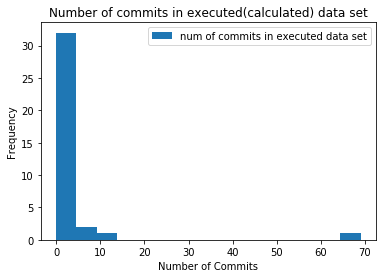

In [37]:
df_result =resultDF
df_original =df
generate_distribution_histogram(df_result, 
                                'num_commits',
                                title = 'Number of commits in executed(calculated) data set',
                                x_axis_label = 'Number of Commits',
                                y_axis_label = 'Frequency',
                                label_name = 'num of commits in executed data set')


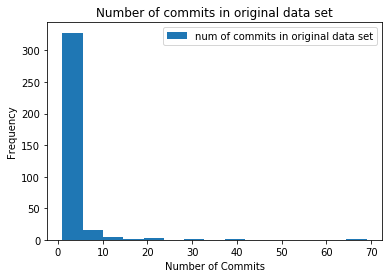

In [38]:
generate_distribution_histogram(df_original, 
                                'num_commits',
                                title = 'Number of commits in original data set',
                                x_axis_label = 'Number of Commits',
                                y_axis_label = 'Frequency',
                                label_name = 'num of commits in original data set')

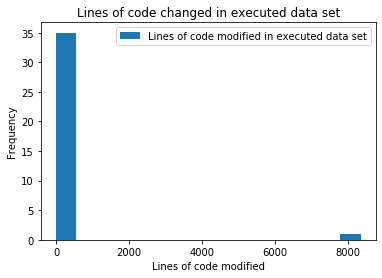

In [39]:
generate_distribution_histogram(df_result, 
                                'code_churn',
                                title = 'Lines of code changed in executed data set',
                                x_axis_label = 'Lines of code modified',
                                y_axis_label = 'Frequency',
                                label_name = 'Lines of code modified in executed data set')

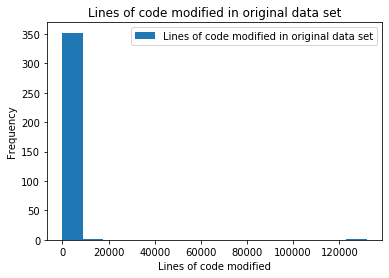

In [40]:
generate_distribution_histogram(df_original, 
                                'code_churn',
                                title = 'Lines of code modified in original data set',
                                x_axis_label = 'Lines of code modified',
                                y_axis_label = 'Frequency',
                                label_name = 'Lines of code modified in original data set')